In [1]:
!pip install -q genaibook

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 151.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 127.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 92.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 93.7 MB/s eta 0:00:00


In [2]:
from genaibook.core import get_device

device = get_device()
print(device)

cuda


## 画像の生成

In [7]:
# モデルのロード
import torch
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained(
    "stable-diffusion-v1-5/stable-diffusion-v1-5",
    torch_dtype = torch.float16,
    variant = "fp16",
).to(device)

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

text_encoder/model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

safety_checker/model.fp16.safetensors:   0%|          | 0.00/608M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.fp16.safete(…):   0%|          | 0.00/1.72G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.fp16.safeten(…):   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


  0%|          | 0/50 [00:00<?, ?it/s]

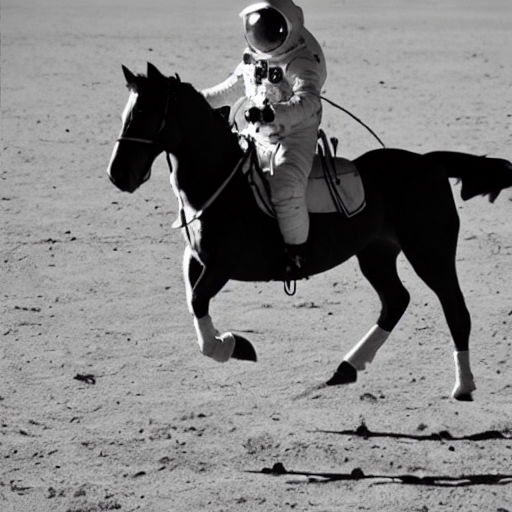

In [11]:
# テキストから画像生成
prompt = "a photograph of an astronaut riding a horse"
pipe(prompt).images[0]

## テキストの生成

In [12]:
from transformers import pipeline

classifier = pipeline("text-classification", device=device)
classifier("This move is disgustingly good!")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda


[{'label': 'POSITIVE', 'score': 0.999832034111023}]

In [13]:
from transformers import set_seed

# シード値の固定
set_seed(10)

In [14]:
generator = pipeline("text-generation", device=device)
prompt = "It was a dark and stormy"
generator(prompt)[0]

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


{'generated_text': 'It was a dark and stormy morning, and my mind went blank.\n\nWalking, I met someone. He looked up at me, like we were in a movie. He didn\'t say a word. He said, "This is your friend. He\'s a member of the group. He\'s not a monster. He\'s not afraid. He doesn\'t have his hands on you, and he doesn\'t have his feet on you, and he doesn\'t have his back to you. He doesn\'t have his voice against you, and he doesn\'t have your thoughts against you."\n\nMy eyes went wide and my eyelids shut. I knew he was there, as was my sister. I saw him with my hands in his. It was a sad moment. I looked up to see what was going on. He was standing on the ground, his head buried in my lap, his face as cold and his eyes as cold and I saw him. He looked confused, as if he never knew what was going to happen. I looked to my left, to my right, to my right.\n\nI didn\'t know what to do. I didn\'t know what to do. I didn\'t know what to do. I didn\'t know what to do. I didn\'t know'}

In [15]:
generator(prompt)[0]["generated_text"]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


'It was a dark and stormy night and the sky was bright, and I saw the sun rise, and the sea come down, and the sea lay flat. And I said, "O God, why do you come into the world, and see what a world it is, and what a world it is not?" And he said, "By the Spirit of God, I believe that God exists, and that He lives on earth; and I will give Him life, and He will give His life to every living creature, and He will give it life to all things that come into His sight. And I will make His flesh and His blood and His blood to go forth in my name, and I will be His Spirit."\n\nI went into the house and saw that I was the only one among all the men who had the power of speaking. And I said, "O God, what a world it is, and what a world it is not!" And he said, "They say that the Lord was in the world to reveal it to the world, not for the world, but to the men and women of the world, and they say that the Lord is in the world to reveal it to the men and women of the world, and it is written, "I 

## サウンドクリップの生成

In [16]:
pipe = pipeline("text-to-audio", model="facebook/musicgen-small", device=device)
data = pipe("electric rock solo, very intense")

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/2.36G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/224 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

Device set to use cuda


In [17]:
print(data)

{'audio': array([[[-1.5658849e-01, -1.6898647e-01, -1.5946080e-01, ...,
         -7.1915996e-04,  1.5332506e-04, -1.8423763e-03]]], dtype=float32), 'sampling_rate': 32000}


In [21]:
import IPython.display as ipd

display(ipd.Audio(data["audio"][0], rate=data["sampling_rate"]))